In [ ]:
!sudo apt install -q cm-super dvipng texlive-latex-extra texlive-latex-recommended

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript
  libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  pfb2t1c2pfb poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  tex-common tex-gyre texlive-base texlive-binaries texlive-fonts-recommended
  texlive-latex-base texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x
  libavalon-framework-java libc

In [ ]:
!nvidia-smi

Fri Aug  2 07:27:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
try:
  import mat73
except:
  !pip install mat73
  import mat73

In [ ]:
!pip install -q tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import seaborn as sns
import time
import pandas as pd
import scipy
import scipy.io

from numpy import linalg as LA
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils.extmath import randomized_svd
from matplotlib.animation import FuncAnimation, writers

from skimage import img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

from scipy.io import savemat

In [ ]:
import tensorflow as tf

from keras.callbacks import Callback

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv2D, ConvLSTM2D, Conv2DTranspose, SeparableConv2D, Flatten, Reshape, LeakyReLU, ReLU, Input
from tensorflow.keras.layers import MaxPool2D, AveragePooling2D, UpSampling2D, TimeDistributed, LayerNormalization
from tensorflow.keras.layers import Add
from tensorflow.keras.layers import Dropout, BatchNormalization

In [ ]:
!pip freeze | grep tensorflow

In [ ]:
font = {'size'   : 18}

matplotlib.rc('font', **font)

In [ ]:
print(tf.__version__)
tf.test.gpu_device_name()

2.15.0


'/device:GPU:0'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7893077866305518397
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14626652160
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15673756738332712444
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
seed = 98374598
tf.random.set_seed(seed)
np.random.seed(seed)

# 1. Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# set working directory
import os
os.chdir("//content/drive/My Drive/abadiaheredia_etal_2024/")

In [ ]:
data_dict = mat73.loadmat('DATA/dataset_laminar.mat')
Ten_orig = data_dict['Tensor'][:,:,:,:,100:]

In [ ]:
Ten_orig.shape

(3, 100, 40, 64, 499)

(0.0, 99.0, 0.0, 39.0)

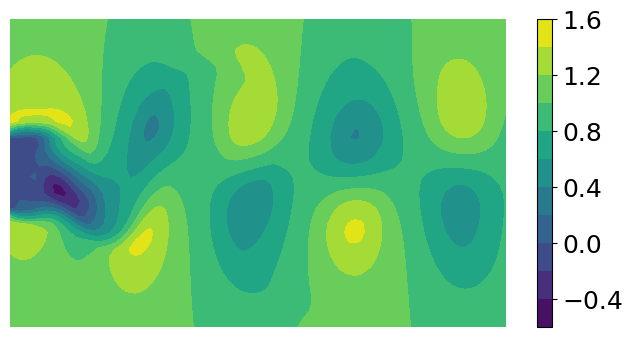

In [ ]:
plt.close('all')
fig1 = plt.figure(figsize=(8,4))
plt.contourf(np.squeeze(Ten_orig[0,:,:,31,100]).T,10)
plt.colorbar()
plt.axis('off')

# 2. Data Split

In [ ]:
train_set = np.copy(Ten_orig[...,:int(0.6*Ten_orig.shape[-1])])
dev_set = np.copy(Ten_orig[...,int(0.6*Ten_orig.shape[-1]):int(0.65*Ten_orig.shape[-1])])
test_set = np.copy(Ten_orig[...,int(0.65*Ten_orig.shape[-1]):])

# Scailing between 0 and 1
ten_min = np.amin(train_set)
ten_range = np.ptp(train_set)
# ten_min = np.mean(train_set, axis = -1)[..., None]
# ten_range = np.std(train_set)

train_set = (train_set - ten_min)/ten_range
dev_set = (dev_set - ten_min)/ten_range
test_set = (test_set - ten_min)/ten_range

train_set = np.transpose(train_set, [4,1,2,3,0])
dev_set = np.transpose(dev_set, [4,1,2,3,0])
test_set = np.transpose(test_set, [4,1,2,3,0])

print(f"Train set shape: {train_set.shape}")
print(f"Dev set shape: {dev_set.shape}")
print(f"Test set shape: {test_set.shape}")

Train set shape: (299, 100, 40, 64, 3)
Dev set shape: (25, 100, 40, 64, 3)
Test set shape: (175, 100, 40, 64, 3)


# 3. Data Windowing

In [ ]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift, samplingRate, batch_size, case="training",
            train_df=train_set, val_df=dev_set, test_df=test_set):

        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        self.batch_size = batch_size
        self.sampling_rate = samplingRate

        # Store case
        self.case = case

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}'])

def split_window(self, features):

    inputs = features[:, self.input_slice, ...]
    labels = features[:, self.labels_slice, ...]

    inputs.set_shape([None, self.input_width, None, None, None])
    labels.set_shape([None, self.label_width, None, None, None])

    return inputs, labels

WindowGenerator.split_window = split_window

def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    if self.case == "training":
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            sampling_rate=self.sampling_rate,
            shuffle=True,
            batch_size=self.batch_size)

    else:
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=self.total_window_size,
            shuffle=False,
            batch_size=self.batch_size)

    ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset

@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    # Get and cache an example batch of 'inputs, labels' for plotting.
    result = getattr(self, '_example', None)
    if result is None:
        # No example batch was found, so get one from the '.train' dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
def window_generator(inputWidth):

  labelWidth=1
  shift=1

  batchSize=8

  w1 = WindowGenerator(input_width = inputWidth, label_width = labelWidth,
                      shift = shift, samplingRate = 1, batch_size = batchSize,
                      train_df = train_set[:,:,:,0,:], val_df = dev_set[:,:,:,0,:],
                       test_df = test_set[:,:,:,0,:])

  w_train = w1.train
  w_val = w1.val

  for i in range(1,Ten_orig.shape[-2]):
    w2 = WindowGenerator(input_width = inputWidth, label_width = labelWidth,
                      shift = shift, samplingRate = 1, batch_size = batchSize,
                      train_df = train_set[:,:,:,i,:], val_df = dev_set[:,:,:,i,:],
                      test_df = test_set[:,:,:,i,:])

    w_train = w_train.concatenate(w2.train)
    w_val = w_val.concatenate(w2.val)

  del w1, w2

  return w_train, w_val

In [ ]:
inputWidth = 10

w_train, w_val = window_generator(inputWidth)

In [ ]:
print(f"Number of training batches: {len(w_train)}")

for example_inputs, example_labels in w_train.take(1):
  in_shape = (example_inputs.shape[1],example_inputs.shape[2],example_inputs.shape[3],example_inputs.shape[4])
  print(f'\nInputs shape (batch size, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch size, time, features): {example_labels.shape}')

Number of training batches: 2368

Inputs shape (batch size, time, features): (8, 10, 100, 40, 3)
Labels shape (batch size, time, features): (8, 1, 100, 40, 3)


In [ ]:
in_shape

(10, 100, 40, 3)

# 4. Autoencoder

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
def identity_block(in_shape, filters=12, name=None):
  block_in = Input(shape=in_shape)
  x_1 = block_in
  print(block_in.shape)
  x = Conv2D(filters=filters, kernel_size=3, strides=1, padding='same',
             data_format='channels_last', use_bias = False, activation = None,
             kernel_initializer = 'he_normal')(block_in)
  x = LayerNormalization()(x)
  x = ReLU()(x)
  x = Conv2D(filters=filters, kernel_size=3, strides=1, padding='same',
             data_format='channels_last', use_bias = False, activation = None,
             kernel_initializer = 'he_normal')(x)
  x = LayerNormalization()(x)
  x = Add()([x,x_1])
  block_out = ReLU()(x)

  return Model(inputs=block_in, outputs=block_out, name=name)

(None, 10, 100, 40, 3)


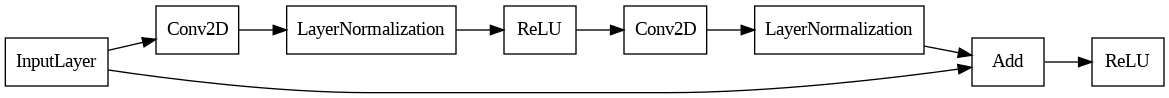

In [ ]:
model = identity_block(in_shape, 3)

tf.keras.utils.plot_model(model, show_layer_names=False, rankdir='LR')

In [ ]:
def conv_block(in_shape, filters=12, name=None):
  block_in = Input(shape=in_shape)
  x_1 = block_in
  print(block_in.shape)
  x = Conv2D(filters=filters, kernel_size=3, strides=2, padding='same',
             data_format='channels_last', use_bias = False, activation = None,
             kernel_initializer = 'he_normal')(block_in)
  x = LayerNormalization()(x)
  x = ReLU()(x)
  x = Conv2D(filters=filters, kernel_size=3, strides=1, padding='same',
             data_format='channels_last', use_bias = False, activation = None,
             kernel_initializer = 'he_normal')(x)
  x = LayerNormalization()(x)
  x_1 = Conv2D(filters=filters, kernel_size=1, strides=2, padding='valid',
             data_format='channels_last', use_bias = False, activation = None,
             kernel_initializer = 'he_normal')(x_1)
  x = Add()([x,x_1])
  block_out = ReLU()(x)

  return Model(inputs=block_in, outputs=block_out, name=name)

(None, 10, 100, 40, 3)


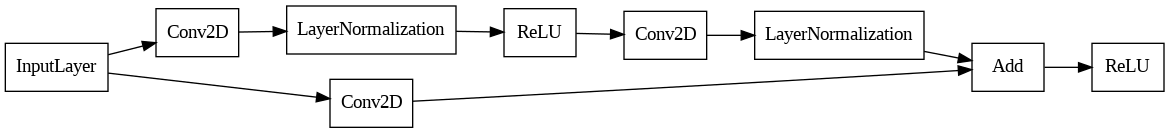

In [ ]:
model = conv_block(in_shape)

tf.keras.utils.plot_model(model, show_layer_names=False, rankdir='LR')

In [ ]:

res_in = Input(shape=in_shape)

x = Conv2D(filters=16, kernel_size=(3,3), strides=(2,1), padding='valid',
            activation=None, data_format='channels_last',
            kernel_initializer='he_normal')(res_in)
x = LayerNormalization()(x)
x = ReLU()(x)
x = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid',
            activation=None, data_format='channels_last',
            kernel_initializer='he_normal')(x)
x = LayerNormalization()(x)
x = ReLU()(x)

for i in range(3):
  name = 'identity_block_' + str(i)
  x = identity_block(x.shape[1:], filters=32, name=name)(x)

x = conv_block(x.shape[1:], filters=64, name='conv_block_1')(x)

for i in range(3):
  name = 'identity_block_' + str(i+3)
  x = identity_block(x.shape[1:], filters=64, name=name)(x)

res_out = x

res_encoder = Model(inputs=res_in, outputs=res_out, name='res_encoder')

(None, 10, 47, 36, 32)
(None, 10, 47, 36, 32)
(None, 10, 47, 36, 32)
(None, 10, 47, 36, 32)
(None, 10, 24, 18, 64)
(None, 10, 24, 18, 64)
(None, 10, 24, 18, 64)


In [ ]:
res_encoder.summary()

Model: "res_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10, 100, 40, 3)   0         
                             ]                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 49, 38, 16)    448       
                                                                 
 layer_normalization_4 (Lay  (None, 10, 49, 38, 16)    32        
 erNormalization)                                                
                                                                 
 re_lu_4 (ReLU)              (None, 10, 49, 38, 16)    0         
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 47, 36, 32)    4640      
                                                                 
 layer_normalization_5 (Lay  (None, 10, 47, 36, 32)    

In [ ]:
dec_in = Input(shape=(24,18,128))

x = Conv2DTranspose(filters=64, kernel_size=(3,3), strides=(2,2), padding='valid',
                    data_format='channels_last', activation = None,
                    use_bias = False, kernel_initializer = 'he_normal')(dec_in)
x = LayerNormalization()(x)
x = ReLU()(x)

x = Conv2DTranspose(filters=32, kernel_size=(4,4), strides=(2,1),
                    padding='valid', data_format='channels_last',
                    activation = None, use_bias = False,
                    kernel_initializer = 'he_normal')(x)
x = LayerNormalization()(x)
x = ReLU()(x)

x = Conv2D(filters=3, kernel_size=(1,1), activation = None, use_bias = False,
                    kernel_initializer = 'glorot_uniform')(x)

x = Reshape((1,x.shape[1],x.shape[2],x.shape[3]))(x)

dec_out = x

res_decoder = Model(inputs=dec_in, outputs=dec_out, name='res_decoder')

In [ ]:
res_decoder.summary()

Model: "res_decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 24, 18, 128)]     0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 49, 37, 64)        73728     
 anspose)                                                        
                                                                 
 layer_normalization_20 (La  (None, 49, 37, 64)        128       
 yerNormalization)                                               
                                                                 
 re_lu_20 (ReLU)             (None, 49, 37, 64)        0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 100, 40, 32)       32768     
 Transpose)                                                      
                                                       

In [ ]:
hidden_in = Input(shape=(inputWidth, 24, 18, 64))

x = ConvLSTM2D(128, (3, 3), padding="same", return_sequences=False,
                 data_format='channels_last', dropout=0.0, use_bias = False,
                 recurrent_dropout=0.0)(hidden_in)
x = LayerNormalization()(x)

hidden_out = x

hidden = Model(inputs=hidden_in, outputs=hidden_out, name='hidden')

In [ ]:
hidden.summary()

Model: "hidden"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 10, 24, 18, 64)   0         
                             ]                                   
                                                                 
 conv_lstm2d (ConvLSTM2D)    (None, 24, 18, 128)       884736    
                                                                 
 layer_normalization_22 (La  (None, 24, 18, 128)       256       
 yerNormalization)                                               
                                                                 
Total params: 884992 (3.38 MB)
Trainable params: 884992 (3.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
tf.keras.backend.clear_session()

input_DCA = Input(shape=in_shape)

x_enc = res_encoder(input_DCA)

x_hidden = hidden(x_enc)

out_DCA = res_decoder(x_hidden)

model_autoencoder = Model(inputs=input_DCA, outputs=out_DCA, name='residual_autoencoder')

In [ ]:
model_autoencoder.summary()

Model: "residual_autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 100, 40, 3)   0         
                             ]                                   
                                                                 
 res_encoder (Functional)    (None, 10, 24, 18, 64)    340416    
                                                                 
 hidden (Functional)         (None, 24, 18, 128)       884992    
                                                                 
 res_decoder (Functional)    (None, 1, 100, 40, 3)     106784    
                                                                 
Total params: 1332192 (5.08 MB)
Trainable params: 1332192 (5.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 5. Training

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)

t0 = time.time()

model_autoencoder.compile(optimizer=optimizer, loss='mse')
history=model_autoencoder.fit(w_train, epochs=30, validation_data=w_val)

t1 = time.time()
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Epoch 1/30
2368/2368 [==============================] - 580s 238ms/step - loss: 0.0022 - val_loss: 1.8007e-04
Epoch 2/30
2368/2368 [==============================] - 561s 237ms/step - loss: 8.4538e-05 - val_loss: 1.4031e-04
Epoch 3/30
2368/2368 [==============================] - 560s 236ms/step - loss: 6.1546e-05 - val_loss: 1.1771e-04
Epoch 4/30
2368/2368 [==============================] - 561s 237ms/step - loss: 4.5777e-05 - val_loss: 9.2551e-05
Epoch 5/30
2368/2368 [==============================] - 560s 237ms/step - loss: 3.4371e-05 - val_loss: 7.7036e-05
Epoch 6/30
2368/2368 [==============================] - 560s 236ms/step - loss: 2.7817e-05 - val_loss: 6.9819e-05
Epoch 7/30
2368/2368 [==============================] - 560s 237ms/step - loss: 2.2741e-05 - val_loss: 7.2215e-05
Epoch 8/30
2368/2368 [==============================] - 560s 237ms/step - loss: 1.9673e-05 - val_loss: 6.1264e-05
Epoch 9/30
2368/2368 [==============================] - 560s 237ms/step - loss: 1.5638e-05 -

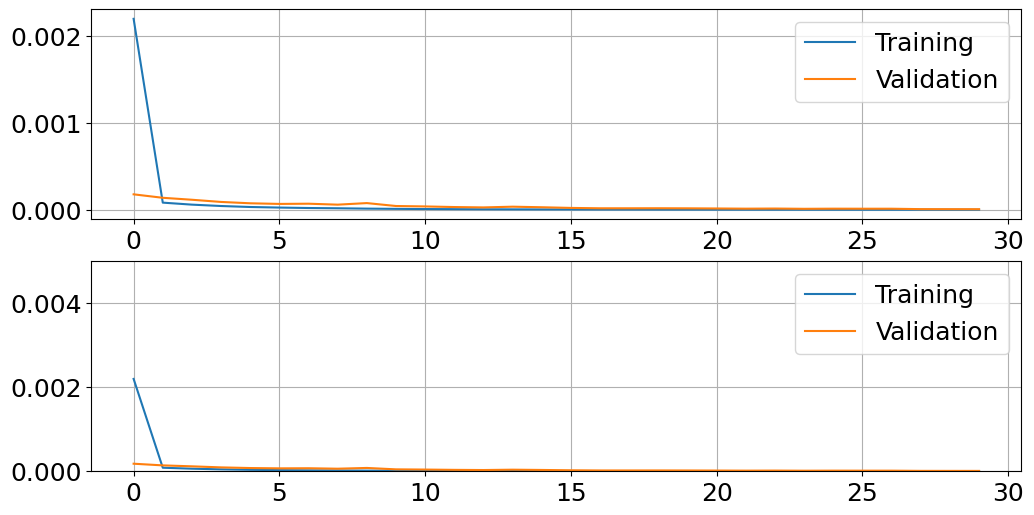

In [ ]:
plt.close('all')

fig_loss = plt.figure(figsize=(12,6))
plt.subplot(2, 1, 1)
plt.plot(history.history["loss"], label='Training')
plt.plot(history.history["val_loss"], label='Validation')
plt.legend()
plt.grid(True, which='both')

ax = plt.subplot(2, 1, 2)
ax.set_ylim(0, 0.005)
plt.plot(history.history["loss"], label='Training')
plt.plot(history.history["val_loss"], label='Validation')
plt.legend()
plt.grid(True, which='both')

#plt.savefig("Figures/"+ Name +"/autoencoder_CNN_ReLU/loss_function.eps", format='eps')

# Load weigths (IF the model was previously trained)

In [ ]:
"""
file_name = f"Models_weights/weights_residual_ae_synthetic_new.h5"
model_autoencoder.save_weights(file_name)

file_name = f"Models_weights/weights_residual_encoder_synthetic_new.h5"
res_encoder.save_weights(file_name)
"""

# file_name = f"Models_weights/weights_residual_ae_laminar.h5"
# model_autoencoder.load_weights(file_name)

# file_name = f"Models_weights/weights_residual_encoder_laminar.h5"
# res_encoder.load_weights(file_name)

# Testing

In [ ]:
def evaluate_model_test_iter(ten_orig_1, time_pred = 10, start_pnt = 10):

  ten_orig = np.copy(ten_orig_1)

  predictions = np.empty((ten_orig.shape[0], ten_orig.shape[1],
                          ten_orig.shape[2], ten_orig.shape[3], time_pred))

  snap = np.copy(ten_orig[..., start_pnt - 10 : start_pnt])
  snap = (snap - ten_min) / ten_range
  snap = np.transpose(snap, [3, 4, 1, 2, 0])

  for i in range(time_pred):

    pred = model_autoencoder.predict(snap, verbose = 0)

    pred_1 = np.transpose(np.copy(pred[:, 0, :, :, :]), [3, 1, 2, 0])
    pred_1 = pred_1 * ten_range + ten_min

    predictions[...,i] = pred_1

    snap = np.concatenate([snap[:,1:,:,:,:], pred], axis = 1)

  del ten_orig, snap, pred, pred_1

  return predictions

In [ ]:
t0 = time.time()

start_pnt = train_set.shape[0]
predictions = evaluate_model_test_iter(Ten_orig, 200, start_pnt)

t1 = time.time()
print("Seconds elapsed: %f" % (t1 - t0))

Seconds elapsed: 165.071096


Text(0.5, 1.0, 'Forecast')

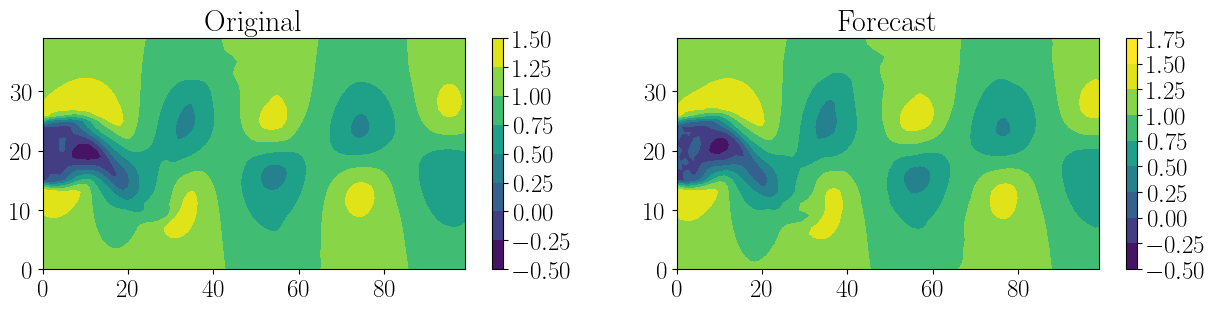

In [ ]:
select_snap = 199
comp = 0
span_ch = 32

snap_pred = predictions[comp, :, :, span_ch, select_snap]
snap_target = Ten_orig[comp, :, :, span_ch, start_pnt + select_snap]

fig3 = plt.figure(figsize=(15, 3))

vmin = np.amin(snap_target)
vmax = np.amax(snap_target)

plt.subplot(1, 2, 1)
plt.contourf(snap_target.T, vmin = vmin, vmax = vmax)
plt.colorbar()
plt.title("Original")

plt.subplot(1, 2, 2)
plt.contourf(snap_pred.T, vmin = vmin, vmax = vmax)
plt.colorbar()
plt.title("Forecast")

# Plot latent space

In [ ]:
for batch in w_train:
  in_, out_ = batch

  break

print(in_.shape)

(8, 10, 100, 40, 3)


In [ ]:
_1 = res_encoder.predict(in_)

1/1 [==============================] - 1s 1s/step


In [ ]:
print(f"Latent space shape: {_1.shape}")

Latent space shape: (8, 10, 24, 18, 64)


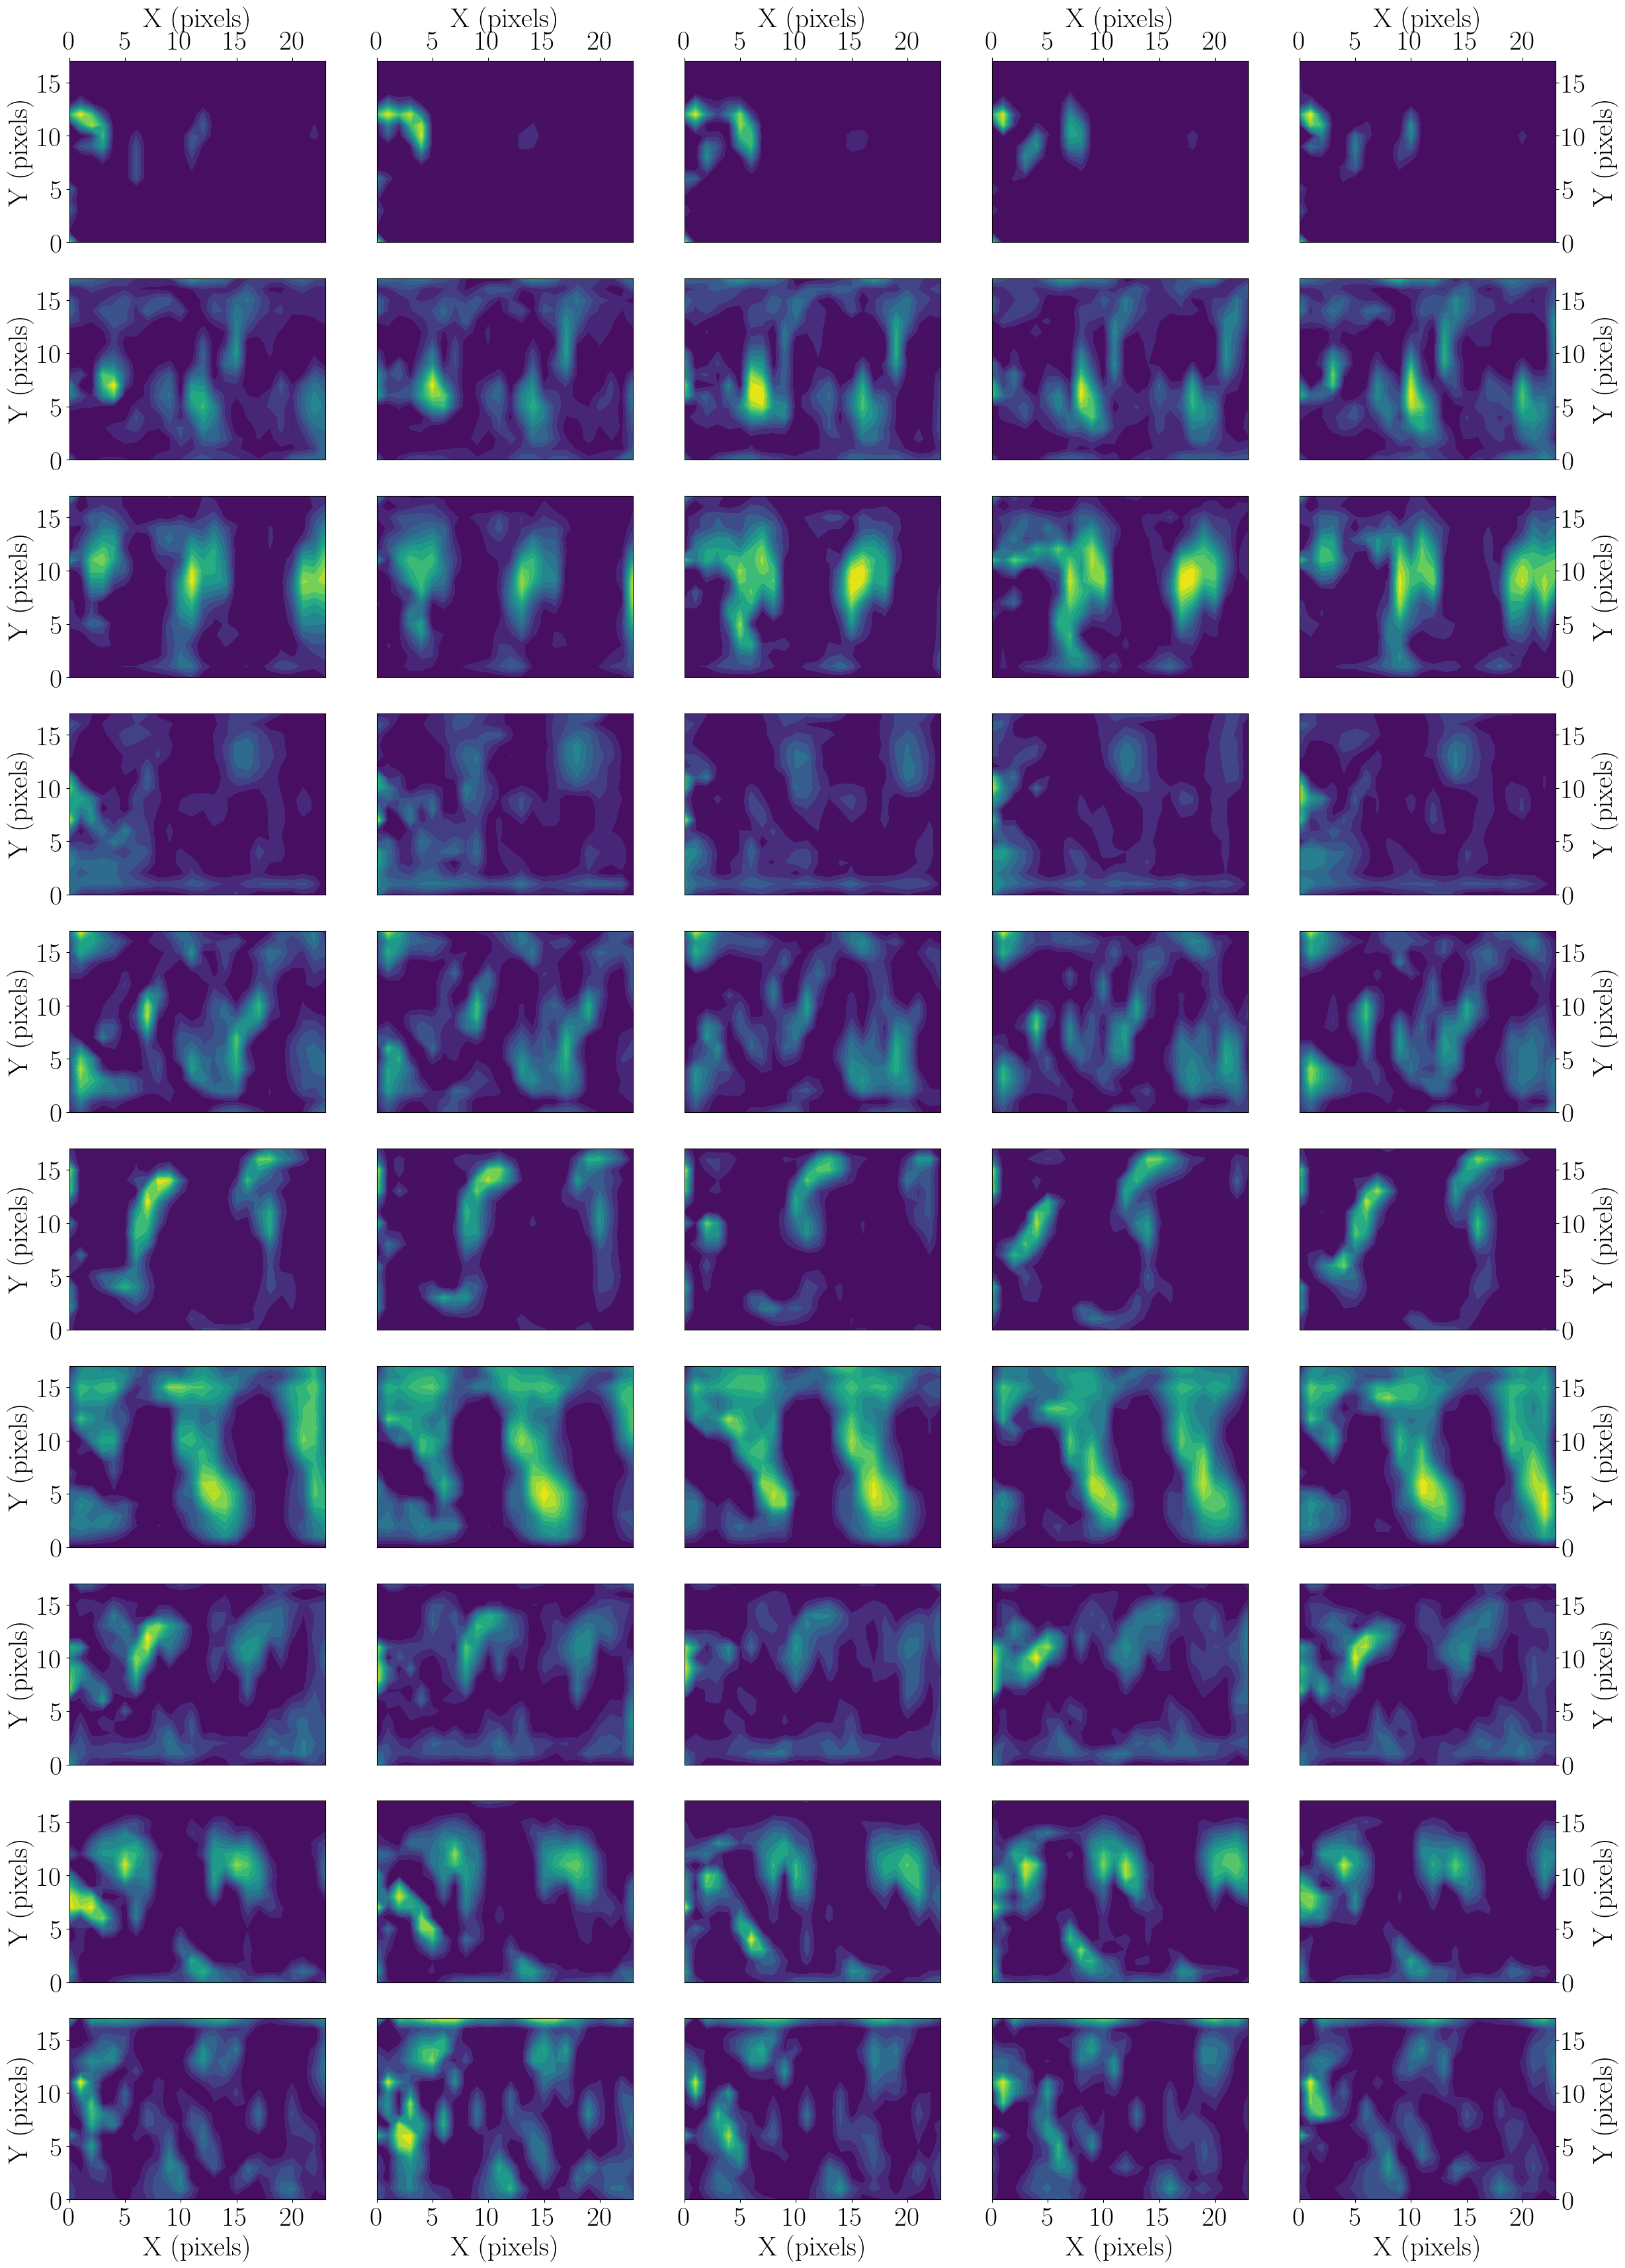

In [ ]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "DejaVu Sans"
})
font = {'size'   : 30}

matplotlib.rc('font', **font)

fig, axs = plt.subplots(10, 5, figsize = (29, 42))

for i in range(5):
  axs[0,i].contourf(_1[0, i, :, :,0].T, 13)
  # axs[0,i].axis(False)
  axs[0,i].xaxis.tick_top()
  axs[0,i].set_xlabel("X (pixels)")
  axs[0,i].xaxis.set_label_position('top')
  if (i != 0 and i != 4):
    axs[0,i].get_yaxis().set_visible(False)
  if (i == 4):
    axs[0,i].yaxis.tick_right()
    axs[0,i].set_ylabel("Y (pixels)")
    axs[0,i].yaxis.set_label_position('right')
  if (i == 0):
    axs[0,i].set_ylabel("Y (pixels)")

  axs[1,i].contourf(_1[0, i, :, :,1].T, 13)
  axs[1,i].get_xaxis().set_visible(False)
  if (i != 0 and i != 4):
    axs[1,i].get_yaxis().set_visible(False)
  if (i == 4):
    axs[1,i].yaxis.tick_right()
    axs[1,i].set_ylabel("Y (pixels)")
    axs[1,i].yaxis.set_label_position('right')
  if (i == 0):
    axs[1,i].set_ylabel("Y (pixels)")

  axs[2,i].contourf(_1[0, i, :, :,2].T, 13)
  axs[2,i].get_xaxis().set_visible(False)
  if (i != 0 and i != 4):
    axs[2,i].get_yaxis().set_visible(False)
  if (i == 4):
    axs[2,i].yaxis.tick_right()
    axs[2,i].set_ylabel("Y (pixels)")
    axs[2,i].yaxis.set_label_position('right')
  if (i == 0):
    axs[2,i].set_ylabel("Y (pixels)")

  axs[3,i].contourf(_1[0, i, :, :,3].T, 13)
  axs[3,i].get_xaxis().set_visible(False)
  if (i != 0 and i != 4):
    axs[3,i].get_yaxis().set_visible(False)
  if (i == 4):
    axs[3,i].yaxis.tick_right()
    axs[3,i].set_ylabel("Y (pixels)")
    axs[3,i].yaxis.set_label_position('right')
  if (i == 0):
    axs[3,i].set_ylabel("Y (pixels)")

  axs[4,i].contourf(_1[0, i, :, :,4].T, 13)
  axs[4,i].get_xaxis().set_visible(False)
  if (i != 0 and i != 4):
    axs[4,i].get_yaxis().set_visible(False)
  if (i == 4):
    axs[4,i].yaxis.tick_right()
    axs[4,i].set_ylabel("Y (pixels)")
    axs[4,i].yaxis.set_label_position('right')
  if (i == 0):
    axs[4,i].set_ylabel("Y (pixels)")

  axs[5,i].contourf(_1[0, i, :, :,9].T, 13)
  axs[5,i].get_xaxis().set_visible(False)
  if (i != 0 and i != 4):
    axs[5,i].get_yaxis().set_visible(False)
  if (i == 4):
    axs[5,i].yaxis.tick_right()
    axs[5,i].set_ylabel("Y (pixels)")
    axs[5,i].yaxis.set_label_position('right')
  if (i == 0):
    axs[5,i].set_ylabel("Y (pixels)")

  axs[6,i].contourf(_1[0, i, :, :,19].T, 13)
  axs[6,i].get_xaxis().set_visible(False)
  if (i != 0 and i != 4):
    axs[6,i].get_yaxis().set_visible(False)
  if (i == 4):
    axs[6,i].yaxis.tick_right()
    axs[6,i].set_ylabel("Y (pixels)")
    axs[6,i].yaxis.set_label_position('right')
  if (i == 0):
    axs[6,i].set_ylabel("Y (pixels)")

  axs[7,i].contourf(_1[0, i, :, :,34].T, 13)
  axs[7,i].get_xaxis().set_visible(False)
  if (i != 0 and i != 4):
    axs[7,i].get_yaxis().set_visible(False)
  if (i == 4):
    axs[7,i].yaxis.tick_right()
    axs[7,i].set_ylabel("Y (pixels)")
    axs[7,i].yaxis.set_label_position('right')
  if (i == 0):
    axs[7,i].set_ylabel("Y (pixels)")

  axs[8,i].contourf(_1[0, i, :, :,54].T, 13)
  axs[8,i].get_xaxis().set_visible(False)
  if (i != 0 and i != 4):
    axs[8,i].get_yaxis().set_visible(False)
  if (i == 4):
    axs[8,i].yaxis.tick_right()
    axs[8,i].set_ylabel("Y (pixels)")
    axs[8,i].yaxis.set_label_position('right')
  if (i == 0):
    axs[8,i].set_ylabel("Y (pixels)")

  axs[9,i].contourf(_1[0, i, :, :,63].T, 13)
  axs[9,i].set_xlabel("X (pixels)")
  if (i != 0 and i != 4):
    axs[9,i].get_yaxis().set_visible(False)
  if (i == 4):
    axs[9,i].yaxis.tick_right()
    axs[9,i].set_ylabel("Y (pixels)")
    axs[9,i].yaxis.set_label_position('right')
  if (i == 0):
    axs[9,i].set_ylabel("Y (pixels)")

# fig.tight_layout()

# plt.savefig('encoder_outputs.eps', format = 'eps', bbox_inches='tight')

font = {'size'   : 18}

matplotlib.rc('font', **font)

# Measure Error

In [ ]:
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim

def calculate_rrmse_flat(predictions, targets):

    rrmse_arr = []
    ssmi_arr = []
    comp = 0

    for i in range(predictions.shape[-1]):
        diff = targets[comp, ..., i] - predictions[comp, ..., i]

        rrmse = np.linalg.norm(diff.flatten(), ord = 2) / np.linalg.norm(targets[comp, ..., i].flatten(), ord = 2)

        rrmse_arr.append(rrmse)

        orig_snap = img_as_float(targets[comp, ..., i])
        pred_snap = img_as_float(predictions[comp, ..., i])

        ssmi_arr.append(ssim(orig_snap, pred_snap, data_range = orig_snap.max() - orig_snap.min()))

    font = {'size'   : 18}

    matplotlib.rc('font', **font)

    len_pred = predictions.shape[-1]

    fig_rrmse = plt.figure(figsize=(25,11))

    plt.subplot(2, 1, 1)
    plt.plot(np.arange(start_pnt + 100, start_pnt + len_pred + 100), rrmse_arr[:len_pred], 'ro-', label='RRMSE', linewidth = 2.0, markersize = 8)
    plt.xticks(np.arange(start_pnt + 100, start_pnt + len_pred + inputWidth + 100, 10.0))

    plt.grid(True, linestyle = "--", linewidth = 1.5)
    plt.title("RRMSE")
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(np.arange(start_pnt + 100, start_pnt + len_pred + 100), ssmi_arr[:len_pred], 'ro-', label='ssmi', linewidth = 2.0, markersize = 8)
    plt.xticks(np.arange(start_pnt + 100, start_pnt + len_pred + inputWidth + 100, 10.0))

    plt.grid(True, linestyle = "--", linewidth = 1.5)
    plt.title("SSMI")
    plt.legend()

    return None

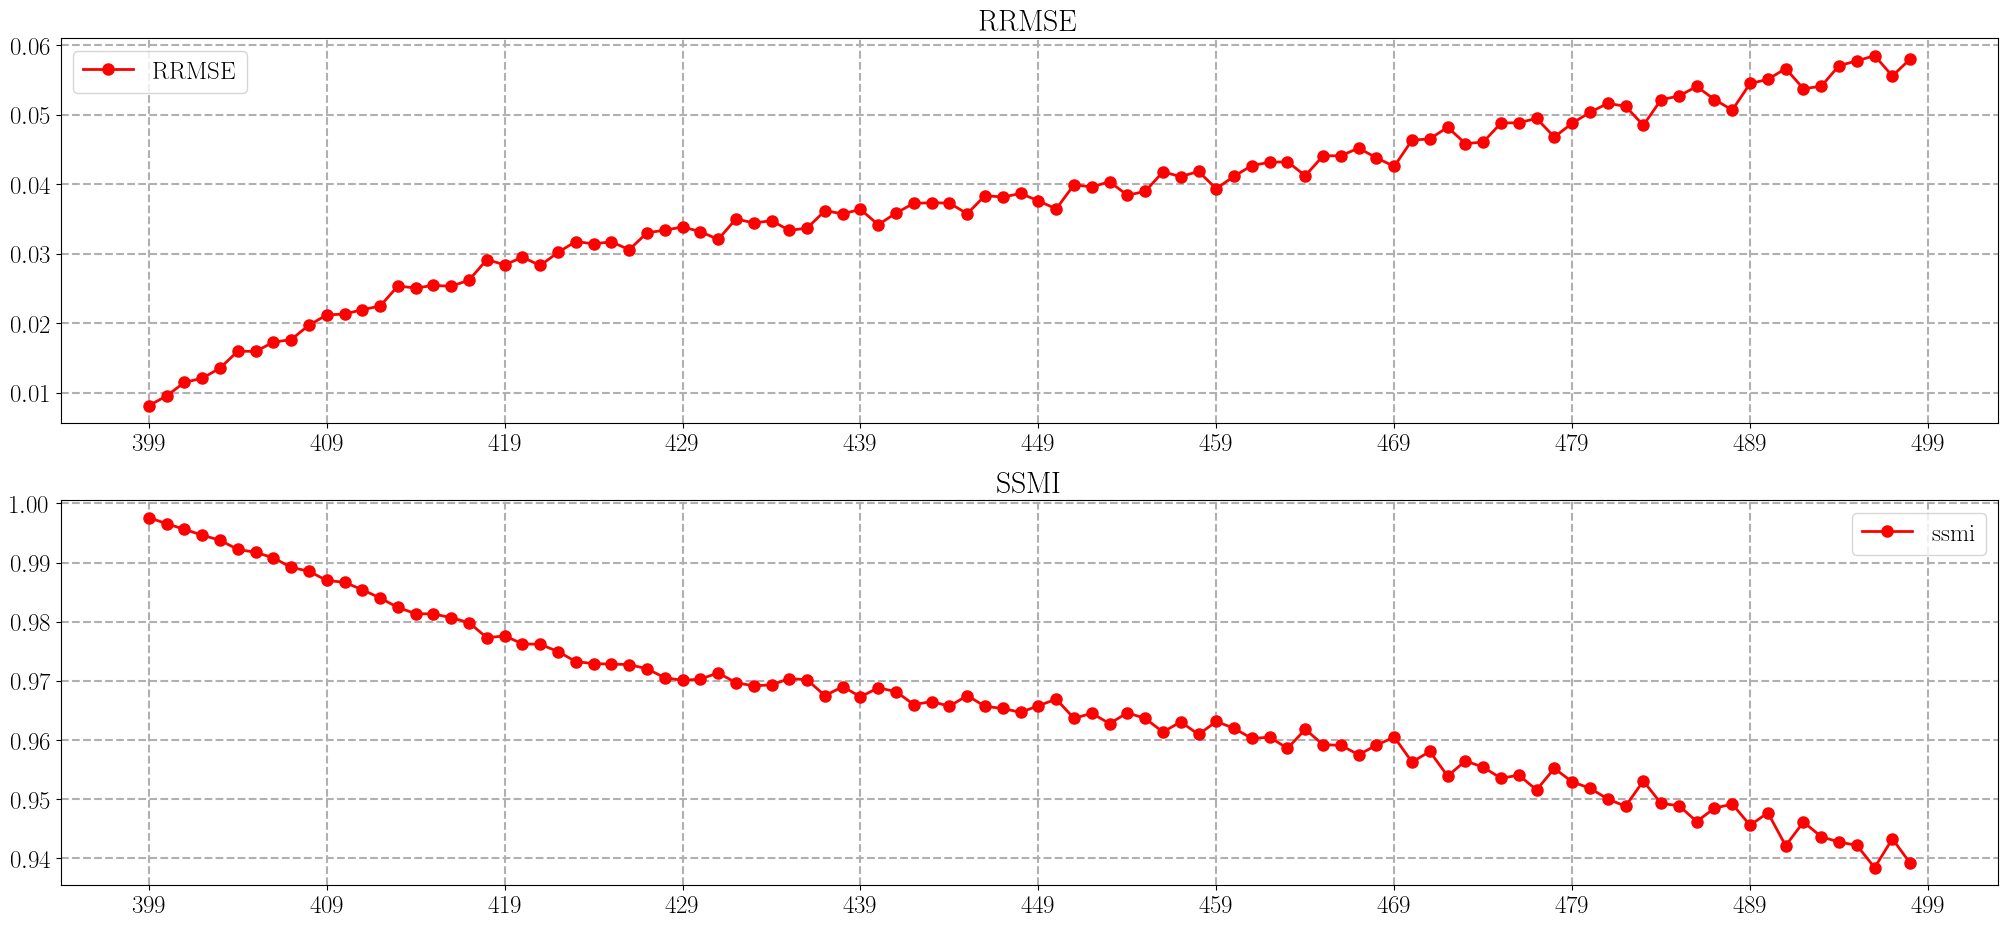

In [ ]:
calculate_rrmse_flat(predictions[0:1, ...], Ten_orig[0:1,:,:,:,start_pnt:])